In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)



In [155]:
df=pd.read_csv('houseprice.csv')

In [156]:
df.isnull().sum() /df.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [157]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [158]:
df.duplicated().sum()

0

In [159]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [160]:
missing_percent = df.isnull().sum() * 100 / len(df)
missing_percent = missing_percent[missing_percent > 45].index.tolist()
df.drop(missing_percent, axis=1, inplace=True)



In [161]:
# df.replace(np.nan,0,inplace=True)


In [162]:
data_num = df.select_dtypes(include=np.number)


In [163]:
data_not_num = df.select_dtypes(exclude=np.number)

In [164]:
df[data_num.columns] = df[data_num.columns].fillna(df[data_num.columns].mean())
df[data_not_num.columns] = df[data_not_num.columns].fillna(df[data_not_num.columns].mode().iloc[0])
data_num=data_num.fillna(data_num.mean())
data_not_num=data_not_num.fillna(data_not_num.mode().iloc[0])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(data_num.drop('SalePrice',axis=1), data_num['SalePrice'], test_size=0.2, random_state=42)

In [166]:
X_train.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [167]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from matplotlib import pyplot

Text(0, 0.5, 'Mutual Information')

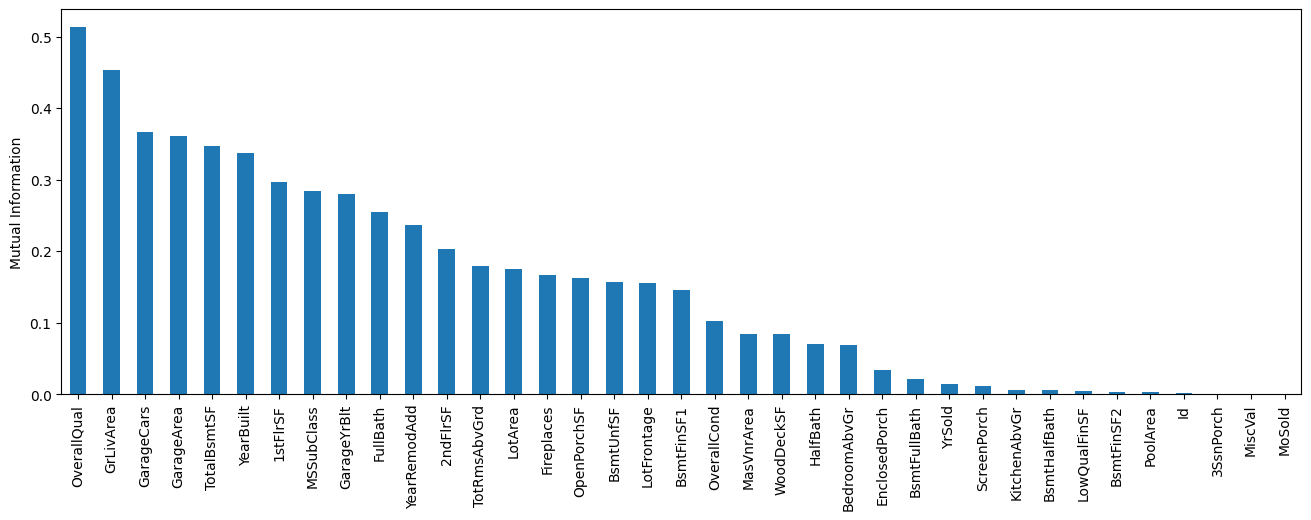

In [168]:
mi=mutual_info_regression(X_train,y_train)
mi=pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(16,5))
plt.ylabel('Mutual Information')


Select top 10th percentile features

In [169]:
sel_=SelectPercentile(mutual_info_regression,percentile=25).fit(X_train,y_train)
X_train.columns[sel_.get_support()]


Index(['MSSubClass', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [170]:
X_train=sel_.transform(X_train)
X_test=sel_.transform(X_test)


In [171]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [172]:
y_pred=model.predict(X_test)

In [173]:
y_pred

array([146454.25002045, 295995.59386392, 119435.82714667, 177301.98027605,
       295279.52048399,  35451.84813482, 207986.20411092, 156458.49979718,
        34867.72330283, 128925.32367843, 164720.5851871 , 113648.69146725,
        95318.60985244, 230822.68914888, 196080.90822947, 117171.43189888,
       218056.85292819, 127397.95624502, 124328.03610949, 226501.88462374,
       180726.78310093, 234366.54642418, 183658.085901  , 113665.06187897,
       222594.86765551, 164249.93552001, 217335.25666249,  98327.90439292,
       190473.18071688, 200864.36939484, 121677.06623851, 252652.60274587,
       216056.25207621,  93601.84619444, 274404.3398965 , 153051.33706255,
       159555.10820452, 228250.05255621, 300380.50510258,  98281.7674398 ,
       149147.10194207, 238461.48108646, 121319.3609347 , 308145.408349  ,
       133532.00226176, 167585.88220886, 114934.92987736, 119473.1896497 ,
       345408.92447744, 137574.1814512 , 113355.66646462, 203027.63699231,
       104445.04984194, 3

In [174]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [175]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,y_pred)

In [176]:
MAE,MSE,RMSE,R2

(24978.644962869144, 1558311673.0473812, 39475.456590739785, 0.796838930841398)

In [197]:
from xgboost import XGBRegressor as xgbR
xgb = xgbR(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
predictions = xgb.predict(X_test)   
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(predictions, y_test))))
print("R2 Score : " + str(r2_score(predictions, y_test)))

Mean Absolute Error : 18491.866264447774
Mean Squared Error : 883313980.5249314
Root Mean Squared Error : 29720.598589613423
R2 Score : 0.8592036487788723
